# Flowers Image Recognation Using Manual CNN and 9 Transfer Learning Algorithms 

Testte img gen yok

Basta train ve test ayrimi yaptik

Transfer Learning Modellerin Tarihse Gelisim Sureci:

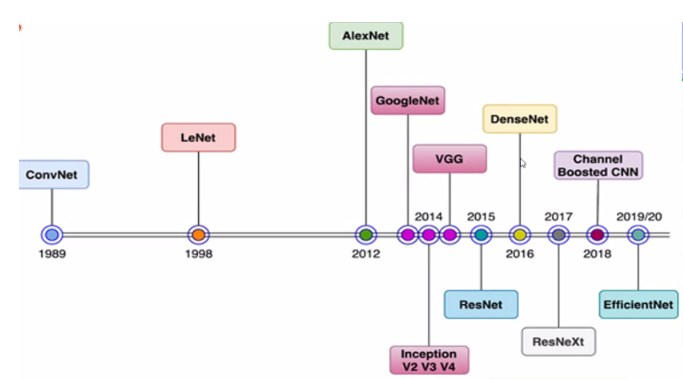


Bu kapsamda biz de calismada asagidaki modelleri kullandik;

1) Manuel CNN 

2) VGG16

3) Resnet152

4) EfficientNetV2B2

5) InceptionV3

6) XCeption

7) MobilNet

8) DenseNet

9) NasNet

10) ConvNeXtTiny


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
pwd

'D:\\DL\\0- Projects\\2. Project - Flower_photos\\ANN CheckPoint ve Reduce LR  Eklenmis Halleri'

In [4]:
my_data_dir='flower_photos'

In [4]:
os.listdir(my_data_dir)

['daisy', 'dandelion', 'roses', 'sunflowers', 'test', 'train', 'tulips']

# Veri Setini Taniyalim

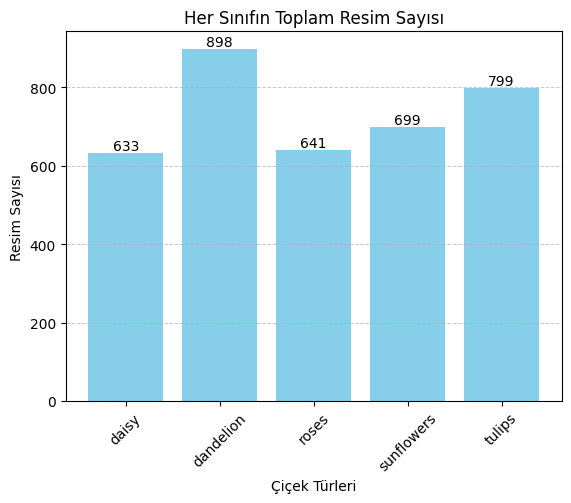

In [11]:
import os
import matplotlib.pyplot as plt

# Çiçek türlerini tanımlayın
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Resimlerin bulunduğu dizini tanımlayın
data_dir = "D:\\DL\\0- Projects\\2. Project - Flower_photos\\flower_photos"

# Her sınıf için toplam resim sayısını hesaplayın
total_counts = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)

# Toplam resim sayılarını bir çubuk grafik ile gösterin
plt.bar(classes, total_counts, color='skyblue')
plt.xlabel('Çiçek Türleri')
plt.ylabel('Resim Sayısı')
plt.title('Her Sınıfın Toplam Resim Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Çubukların üzerine değerleri yazdırın
for i, count in enumerate(total_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

**Cicek sayilari gorece dengeli (balanced) kabul edilebilir**

## Veri Setini Train ve Test Olarak Ayiralim

**Bunu bir defa yaptiktan sonra bu kodu bir daha calistirma!!!**

In [5]:
# Verileri train ve test olarak iki ust klasore ayiralim;

#mevcut klasorun yolunu tanittik;
data_folder = r"D:\DL\0- Projects\2. Project - Flower_photos\ANN CheckPoint ve Reduce LR  Eklenmis Halleri\flower_photos"

#Train ve test klasörlerini oluşturalim:
import os
import shutil

# Train ve test klasörlerini oluşturun
train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

#Her sınıf için train ve test klasörlerini oluşturalim:
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

for flower_class in classes:
    # Sınıfa ait train ve test klasörlerini oluşturun
    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)

    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

# Verileri train ve test klasörlerine kopyalayın. Örneğin, her sınıfın %80'i train, %20'si test olarak ayırmak isterseniz:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)  # Verileri rastgele sıralayın

    split_index = int(len(flower_images) * split_ratio)

    # Train klasörüne kopyala
    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    # Test klasörüne kopyala
    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)

In [5]:
train_path = (r"D:\DL\0- Projects\2. Project - Flower_photos\flower_photos\train")
test_path =(r"D:\DL\0- Projects\2. Project - Flower_photos\flower_photos\test")

print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Veri Setindeki Image Adedine Bakalim

In [7]:
# Verilere genel bir bakis yapalim;  

import os
from sklearn.model_selection import train_test_split

# Veri dizininizi belirtin
my_data_dir = 'flower_photos'

# Sınıf isimlerini alın (LICENSE.txt hariç)
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Tüm resimlerin yollarını toplayın
image_paths = []
labels = []
for class_name in classes:
    class_dir = os.path.join(my_data_dir, class_name)
    class_image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith('.jpg')]
    image_paths += class_image_paths
    labels += [class_name] * len(class_image_paths)

# Eğitim ve test setlerini oluşturun
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, shuffle=True, stratify=labels)

# Eğitim ve test setlerini yazdırın
print(f"Training set: {len(train_image_paths)} images")
print(f"Test set: {len(test_image_paths)} images")

Training set: 2936 images
Test set: 734 images


** Elimizde train data setinde 2936,test data setinde 734 gozlem var. 

## Cicekleri Gorelim

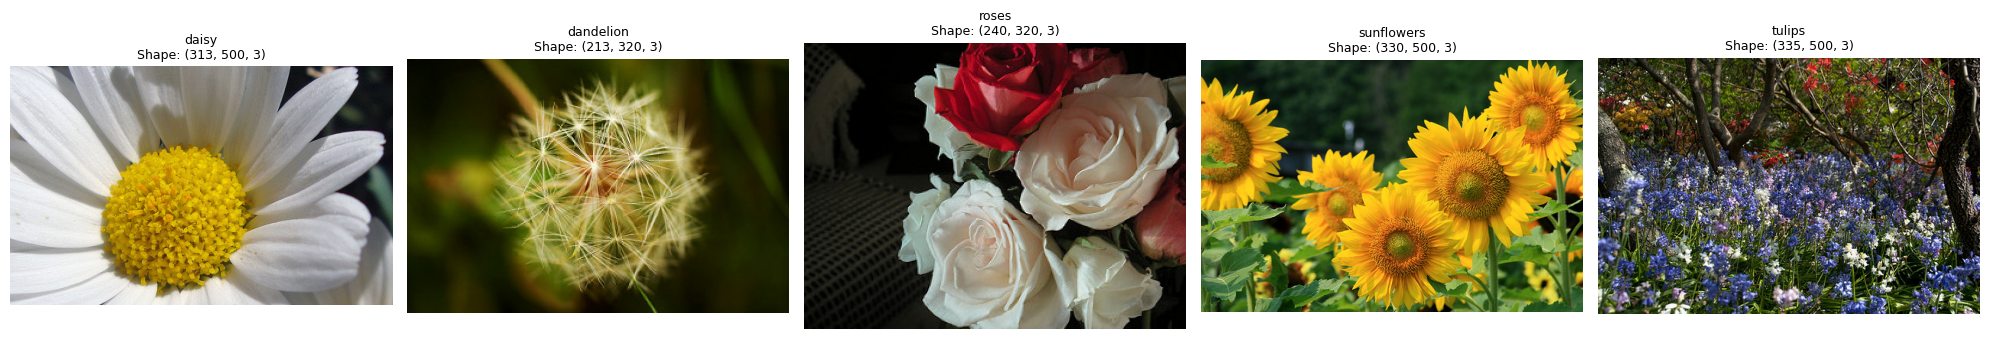

In [17]:
# Trainden rastgele 5 tanesini secip, resimlerini cizdirelim;

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_path, class_name)

    # Bu sınıf için ilk resmin yolu
    first_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    # Resmi açın
    img = Image.open(first_image_path)

    # Resmi bir numpy dizisine çevirin
    img_array = np.array(img)

    # Resmi görselleştirin
    axes[i].imshow(img)
    axes[i].set_title(f"{class_name}\nShape: {img_array.shape}", fontsize=9)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Ciceklerin Olculerine Bakalim

In [11]:
#pip install scikit-image

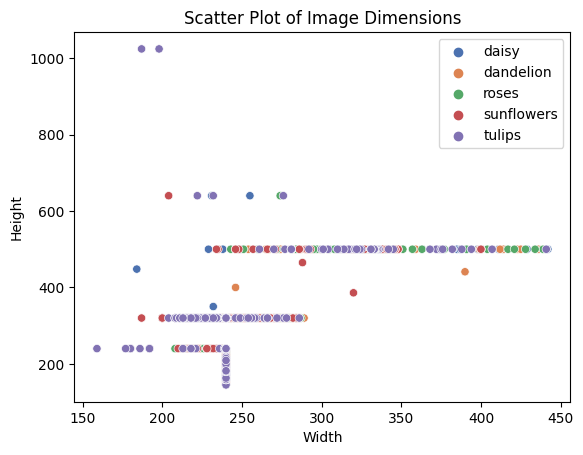

In [18]:
# Elimizdeki (traindeki) cicek resimlerinin ortalama olculerini bulmak istiyoruz;

import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)

sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()


In [19]:
print(np.mean(x), np.mean(y))

271.36980231765506 363.1895023858214


** Cicek resimlerinin ortalama genisligi 272, boyu 365. Bunlari ortalama bir degerde bulusturalim. 

### Final Image Size

Transfer Learning yontemlerinden VGG16 modelini kullanmak istiyorum.  
VGG16 224 X 224 datayla egitildigi icin bu olculeri tercih ettik.

In [6]:
image_shape = (224,224,3) 

### Ciceklerin Pixel Degerlerine Bakalim

In [23]:
path1=train_path+'/daisy'+'/5547758_eea9edfd54_n.jpg'

In [24]:
flower_img=imread(path1)

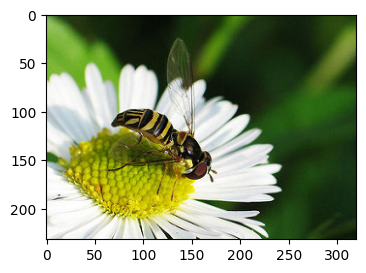

In [23]:
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [25]:
flower_img.max()

255

In [26]:
flower_img.min()

0

** Ciceklerin olculeri resize edilmemis (255'e bolunmemis), Bunu **bolmemiz lazim**. 

## Image Data Generator

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Generator islemini sadece train datasina uygulayacagiz;

image_gen_1 = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Ikinci bir Image Generator daha tanimlayip, birinci ile birlstirerek, daha fazla resim elde etme yoluna gittik;
image_gen_2 = ImageDataGenerator( rotation_range=30,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    rescale=1/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                    )

# İki image generator'ı birleştirerek daha fazla çeşitlilik elde edelim
def combine_generators(*generators):
    for gen in generators:
        for key, value in gen.__dict__.items():
            if key not in ['data_format', 'featurewise_std_normalization', 'samplewise_std_normalization']:
                setattr(generators[0], key, value)
    return generators[0]

# Image generator'ları birleştirin
combined_gen = combine_generators(image_gen_1, image_gen_2)

#-----------------------------------------------------
# Test datasina sadece scaling islemi uygulayacagiz. 
# Boylece sinamayi test datasinin orijinal hallerini kullanarak gerceklestirmek istiyoruz;

image_gen_test = ImageDataGenerator(rescale=1/255)

#**********************************************************************************************
# Img Gen train ve test datalarina uygulayalim;

batch_size = 32

train_image_gen = combined_gen.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

test_image_gen = image_gen_test.flow_from_directory(test_path,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


** Veri sayisi degismedi yine trainde 2936, testte 734 resim, 5 class var. Ama traindeki resimleri her Epoch'da farkli sekillerde kullanarak, sanki cok daha fazla veri varmis gibi, cok daha iyi bir ogrenme gerceklesecek. 

In [8]:
test_image_gen.classes[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Rescaling Sonucunda Resimlerin Pixel Degerlerine Bakalim

In [11]:
train_image_gen.next()[0][0].max() 

1.0

In [11]:
train_image_gen.next()[0][0].min() 

0.0

In [14]:
test_image_gen.next()[0][0].max() 

1.0

In [15]:
test_image_gen.next()[0][0].min() 

0.0

**Rescaling islemi basarili olmus.**

# Creating the Manuel Model 

**Bu asamada manuel olarak CNN modeli olusturduk. Katmanlari, filtre ve pool size/numberleri kendimiz girdik.** 

In [9]:
# Burada klasik "Flatten" kullanarak calistik
# LR manuel girildi
# Checkpoint (ara basamaklarda yakaladgi en iyi modeli kaydederk ilerlemesi) kullanilmadi
# Image Shape 224x224 kullanildi

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


manuel_CNN_model = Sequential()

image_shape=(224,224,3)
# 1. Katman;
manuel_CNN_model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) #padding = 'same': 0 ekle
manuel_CNN_model.add(BatchNormalization())
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
manuel_CNN_model.add(Dropout(0.3))

# 2. Katman;
manuel_CNN_model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
manuel_CNN_model.add(BatchNormalization())
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
manuel_CNN_model.add(Dropout(0.3))

# 3. Katman;
manuel_CNN_model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
manuel_CNN_model.add(BatchNormalization())
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
manuel_CNN_model.add(Dropout(0.3))

# 4. Katman;
manuel_CNN_model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
manuel_CNN_model.add(BatchNormalization())
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
manuel_CNN_model.add(MaxPooling2D(pool_size=(2, 2))) # Fletten 50.000 lerdeydi azaltabilmek icin birden fazla pooling kullandim.
manuel_CNN_model.add(Dropout(0.3))


#Flatten (Input) Katmani
manuel_CNN_model.add(Flatten())

# ---ANN---

# Fully_connected layer;
manuel_CNN_model.add(Dense(128, activation='relu'))
manuel_CNN_model.add(BatchNormalization())
manuel_CNN_model.add(Dropout(0.3))

# Cikis Katmani; 
manuel_CNN_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001) # Baslangic learning  rate degerimiz. LR asagida optimize edilecek. 


# Modeli compile edelim; 
manuel_CNN_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('DenseNet201.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk. 

## Early Stopping

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## Model özeti

In [11]:
manuel_CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 128)     5

## Model Training

In [12]:
manuel_CNN_results = manuel_CNN_model.fit(train_image_gen,
                    epochs=50,
                    validation_data = test_image_gen,
                    callbacks = [early_stop])

Epoch 1/50
92/92 [==============================] - 472s 5s/step - loss: 1.3900 - accuracy: 0.4785 - val_loss: 4.7644 - val_accuracy: 0.2446
Epoch 2/50
92/92 [==============================] - 469s 5s/step - loss: 1.0643 - accuracy: 0.5855 - val_loss: 7.1487 - val_accuracy: 0.2446
Epoch 3/50
92/92 [==============================] - 467s 5s/step - loss: 0.9765 - accuracy: 0.6271 - val_loss: 3.9167 - val_accuracy: 0.2446
Epoch 4/50
92/92 [==============================] - 468s 5s/step - loss: 0.9411 - accuracy: 0.6353 - val_loss: 3.5067 - val_accuracy: 0.2541
Epoch 5/50
92/92 [==============================] - 468s 5s/step - loss: 0.8850 - accuracy: 0.6578 - val_loss: 1.7043 - val_accuracy: 0.4470
Epoch 6/50
92/92 [==============================] - 470s 5s/step - loss: 0.8631 - accuracy: 0.6646 - val_loss: 1.6533 - val_accuracy: 0.5136
Epoch 7/50
92/92 [==============================] - 468s 5s/step - loss: 0.8277 - accuracy: 0.6810 - val_loss: 1.0108 - val_accuracy: 0.6209
Epoch 8/50
92

## Evaluating the Model

In [13]:
manuel_CNN_summary = pd.DataFrame(manuel_CNN_model.history.history)
manuel_CNN_summary.tail()

,loss,accuracy,val_loss,val_accuracy
32,0.482360,0.820382,0.591563,0.770380
33,0.482338,0.809816,0.634311,0.763587
34,0.477640,0.815610,0.597773,0.785326
35,0.470477,0.826176,0.714647,0.716033
36,0.431221,0.838446,0.596746,0.793478


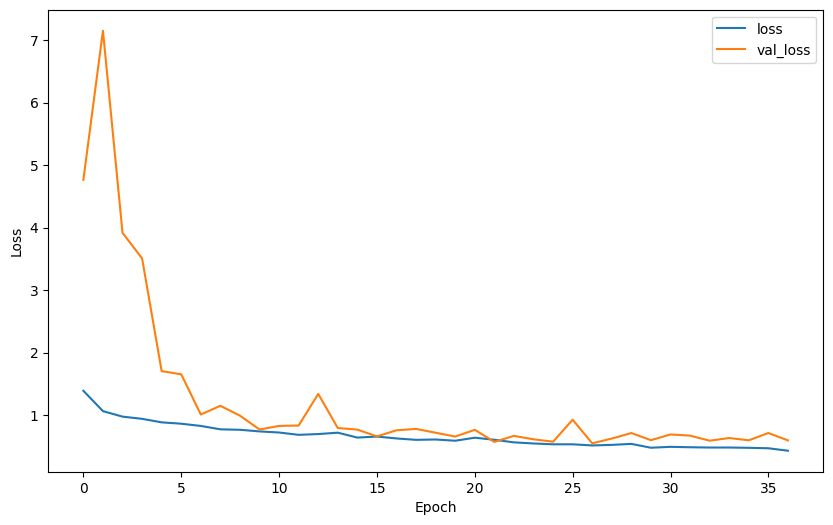

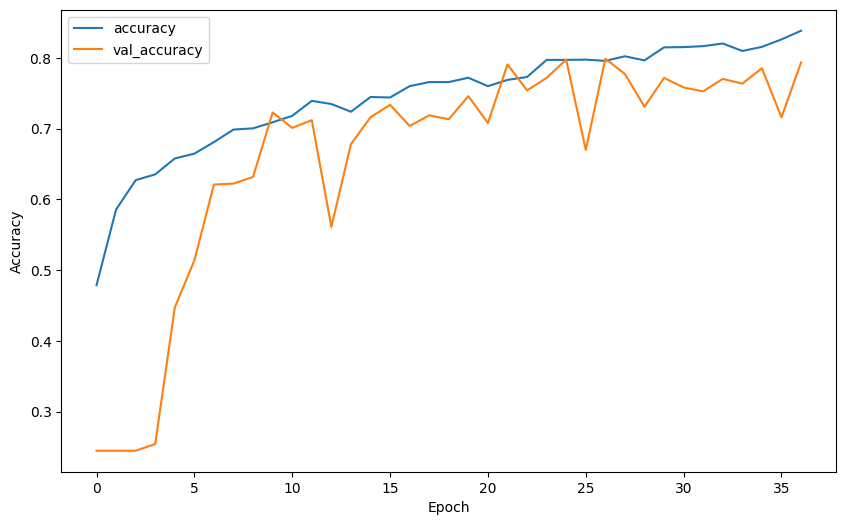

In [14]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(manuel_CNN_summary.loss, label="loss")
plt.plot(manuel_CNN_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(manuel_CNN_summary.accuracy, label="accuracy")
plt.plot(manuel_CNN_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [15]:
manuel_CNN_model_pred_probabilities = manuel_CNN_model.predict(test_image_gen)
manuel_CNN_model_pred_probabilities

# Transform Probabilites to Clasesses 
manuel_CNN_model_probs = np.array(manuel_CNN_model_pred_probabilities)
manuel_CNN_model_predictions = np.argmax(manuel_CNN_model_probs, axis=1)

# Predictions
print("Predictions: ", manuel_CNN_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

23/23 [==============================] - 15s 639ms/step
Predictions:  [3 1 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 4 0 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, manuel_CNN_model_predictions))
print(classification_report(test_image_gen.classes, manuel_CNN_model_predictions))

[[111   4   2   4   6]
 [ 22 123   7  16  12]
 [  5   1  85   2  36]
 [  3   1   3 125   8]
 [  3   1  13   3 140]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       127
           1       0.95      0.68      0.79       180
           2       0.77      0.66      0.71       129
           3       0.83      0.89      0.86       140
           4       0.69      0.88      0.77       160

    accuracy                           0.79       736
   macro avg       0.80      0.80      0.79       736
weighted avg       0.81      0.79      0.79       736



## Modeli Disa Aktaralim (Kaydedeim)

In [298]:
from tensorflow.keras.models import load_model
manuel_CNN_model.save('manuel_CNN_model_New.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting on an Exteral Image

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_manuel_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

# Transfer Learning

Daha onceden egitilmis (Pre-trained) (katman sayilari ve agirliklari optimize edilmis) modellerin degerlerini (agirlik ve katman yapilarini) kullanarak, kendi tahminlerimizi yapacagiz bu asamada.

ChatGPT'nin PT'si de Pre_Trained kelimeleriden geliyor. Yani bu kisim onemli ve kullanisli bir alan.

Soz konusu modellerin tam,listesine ve bu moellerde bizim degistirebilecegimiz parametrelere asagidaki linkten ulasilabilir.

https://keras.io/api/applications/#usage-examples-for-image-classification-models

## Creat the VGG16 Model 

VGG16, Oxford Üniversitesi'nden Visual Geometry Group (VGG) tarafından geliştirilmiş bir derin öğrenme modelidir. 16 katmandan oluşur: 13 konvolüsyonel (Conv), 3 tam bağlantılı (FC) katman. Genellikle görüntü sınıflandırma görevlerinde kullanılır. Imagenet veri setinde eğitilmiş versiyonları yaygındır ve transfer öğrenme için popüler bir seçenektir.

Mimari şematik olarak şöyle görünür:

**Input -> Conv (64) -> Conv (64) -> MaxPool -> Conv (128) -> Conv (128) -> MaxPool -> Conv (256) -> Conv (256) -> Conv (256) -> MaxPool -> Conv (512) -> Conv (512) -> Conv (512) -> MaxPool -> Conv (512) -> Conv (512) -> Conv (512) -> MaxPool -> FC (4096) -> FC (4096) -> FC (1000) -> Softmax -> Output**

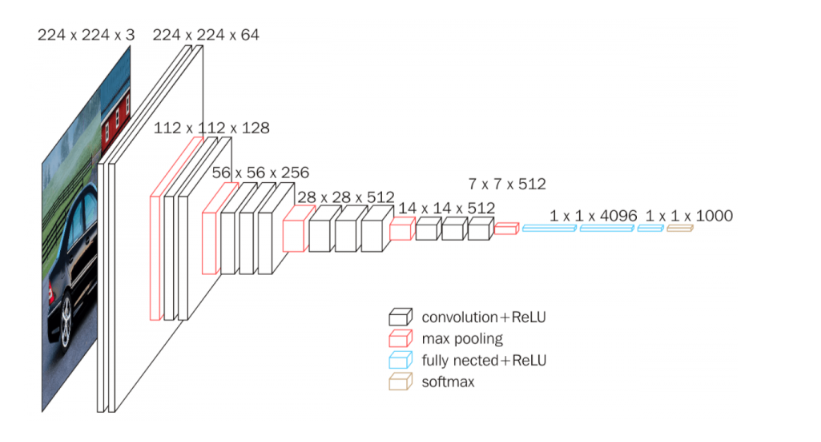

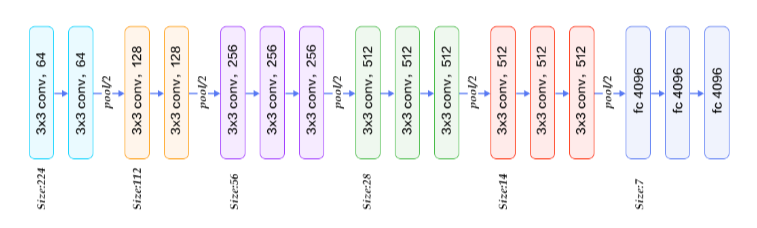

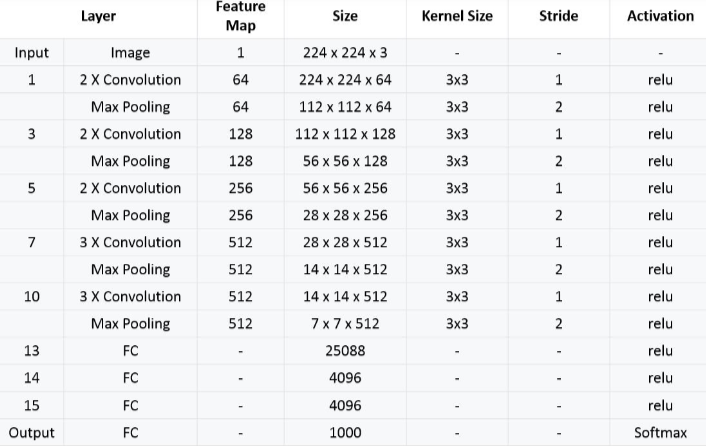



In [13]:
#Flatten kullandik
# Checkpoint var
#LR optimizer var
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions


# VGG16 Modeli cagiralim; 
VGG16_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                                include_top=False,                                                
                                                weights = 'imagenet',
                                                pooling='avg')                           
                                                
# VGG16'nin agirliklarini kullansin;
for layer in pretrained_model.layers: 
        layer.trainable=False

VGG16_model.add(pretrained_model)        

# Flatten Layer (Input)
VGG16_model.add(Flatten())

# ---ANN---

# Fully_connected layer;
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.3))

# Cikis Katmani; 
VGG16_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.

# Modeli compile edelim; 
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])     

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('VGG16_model.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.

# Model özeti
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                        

### Early Stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Model Training

In [15]:
VGG16_model_results = VGG16_model.fit(train_image_gen,
                    epochs=50,
                    validation_data = test_image_gen,
                    callbacks = [early_stop])

Epoch 1/50
92/92 [==============================] - 392s 4s/step - loss: 0.8664 - accuracy: 0.6953 - val_loss: 1.3816 - val_accuracy: 0.3668
Epoch 2/50
92/92 [==============================] - 441s 5s/step - loss: 0.6114 - accuracy: 0.7737 - val_loss: 0.9613 - val_accuracy: 0.6481
Epoch 3/50
92/92 [==============================] - 451s 5s/step - loss: 0.5614 - accuracy: 0.7989 - val_loss: 0.7328 - val_accuracy: 0.7242
Epoch 4/50
92/92 [==============================] - 553s 6s/step - loss: 0.5172 - accuracy: 0.8146 - val_loss: 0.5529 - val_accuracy: 0.8003
Epoch 5/50
92/92 [==============================] - 662s 7s/step - loss: 0.5070 - accuracy: 0.8125 - val_loss: 0.8308 - val_accuracy: 0.7160
Epoch 6/50
92/92 [==============================] - 696s 8s/step - loss: 0.5084 - accuracy: 0.8146 - val_loss: 0.5197 - val_accuracy: 0.8220
Epoch 7/50
92/92 [==============================] - 655s 7s/step - loss: 0.4927 - accuracy: 0.8234 - val_loss: 0.4984 - val_accuracy: 0.8329
Epoch 8/50
92

### Save Model (Yeni teknik)

In [3]:
# Modeli kaydet
VGG16_model.save("saved_model/VGG16_model")

NameError: name 'VGG16_model' is not defined

In [ ]:
#Modeli Yüklemek Icin:
new_model = tf.keras.models.load_model("saved_model/VGG16_model")

In [ ]:
# Önceden yüklediğiniz modeli kullanarak tahminlerde bulunun.
predictions = VGG16_model.predict(new_data)

### Evaluating the Model

In [174]:
VGG16_model_summary = pd.DataFrame(VGG16_model.history.history)
VGG16_model_summary.tail()

""


In [ ]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(VGG16_model_summary.loss, label="loss")
plt.plot(VGG16_model_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(VGG16_model_summary.accuracy, label="accuracy")
plt.plot(VGG16_model_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
VGG16_model_pred_probabilities = VGG16_model.predict(test_image_gen)
VGG16_model_pred_probabilities

# Transform Probabilites to Clasesses 
VGG16_model_probs = np.array(VGG16_model_pred_probabilities)
VGG16_model_predictions = np.argmax(VGG16_model_probs, axis=1)

# Predictions
print("Predictions: ", VGG16_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, VGG16_model_predictions))
print(classification_report(test_image_gen.classes, VGG16_model_predictions))

### Modeli Disa Aktaralim 

In [175]:
from tensorflow.keras.models import load_model
VGG16_model.save('VGG16_New.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('cat_dog_detector.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")


## ResNet152 Model 

Calismani cok uzun suruyor ve dusuk skor uretiyor.


ResNet152, Microsoft Research tarafından geliştirilmiş bir derin öğrenme modelidir. 152 katmandan oluşur ve "artık bağlantılar" (residual connections) kullanır. Bu sayede **vanishing gradient** (Katman sayisi arttiginda onceki katmanlardaki bilginin unutulmasi ve sonraki katmanlara tam olarak iletilememesi) **problemi minimize edilir** ve model daha derin katmanlara sahip olabilir.

Mimari şematik olarak şöyle görünür:

**Input -> Conv1 -> [Conv2_x (3 katman) -> Conv3_x (8 katman) -> Conv4_x (36 katman) -> Conv5_x (3 katman)] -> AvgPool -> FC (1000) -> Softmax -> Output**

Her bir "Conv_x" bloğu, birden fazla "bottle-neck" yapıya sahiptir ve her biri artık bağlantılarla desteklenir.

Transfer öğrenme için genellikle FC katmanı değiştirilip özel bir göreve uygun olarak yeniden eğitilir. ResNet modelleri, görüntü sınıflandırma, nesne tespiti gibi birçok görevde yüksek performans gösterir.

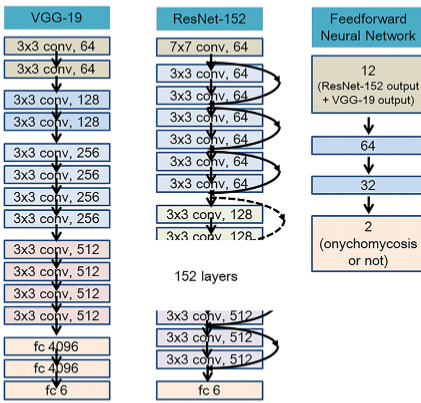


ResNet modelleri genellikle katman sayısına göre sınıflandırılır: **ResNet-18, ResNet-34, ResNet-50, ResNet-101** ve **ResNet-152** gibi. Temel farklılıklar şunlardır:

**Katman Sayısı:** Katman sayısı arttıkça modelin kapasitesi ve karmaşıklığı artar. Örneğin, ResNet-18'de 18, ResNet-152'de 152 katman vardır.

**Bottle-Neck Yapısı:** ResNet-50 ve üstü modellerde bottle-neck yapılar kullanılır. Bu, modelin karmaşıklığını azaltır ve eğitimi hızlandırır.

**Parametre Sayısı:** Katman sayısı arttıkça parametre sayısı da artar, bu da daha fazla hesaplama gücü ve bellek ihtiyacı demektir.

**Performans:** Genellikle katman sayısı arttıkça performans da artar, ancak bu overfitting'e yol açabilir. Model seçimi, spesifik göreve ve veri setine bağlıdır.

**Artık Bağlantılar:** Tüm ResNet modellerinde artık bağlantılar (residual connections) kullanılır, ancak katman sayısı ve yapıları farklılık gösterir.

In [130]:
# Klasik ResNet bu sekilde ama ben en son asagidaki halini (KOD 2) calistirdim.
# Flatten kullandik
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=(224,224,3),
                                                   pooling='avg',
                                                   weights= None)
for layer in pretrained_model.layers: # tum katmanlar UYGULAMAK ICIN
        layer.trainable=False # ResNet152 agirliklarini degistirmemek icin False yaptik. True olursa ResNet152 agirliklarini degistirebiliriz. Guclu bilgiisayarlarda.

resnet_model.add(pretrained_model)  # 152 katmani burada kullaniyoruz

# Ust kismi cok degistirme
#----
# Altta degisiklik yapabilirsin.

resnet_model.add(Flatten())

# ----ANN----
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [299]:
# 2. KOD (Iyilestirme Calismasi)
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=(224,224,3),
                                                   pooling='avg',
                                                   weights= None)
for layer in pretrained_model.layers: # tum katmanlar UYGULAMAK ICIN
        layer.trainable=False # ResNet152 agirliklarini degistirmemek icin False yaptik. True olursa ResNet152 agirliklarini degistirebiliriz. Guclu bilgiisayarlarda.

resnet_model.add(pretrained_model)  # 152 katmani burada kullaniyoruz

# Ust kismi cok degistirme
#----
# Altta degisiklik yapabilirsin.

resnet_model.add(Flatten())

# ---ANN ---
# Fully Connected Layer
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))

# Çıkış Katmanı
resnet_model.add(Dense(5, activation='softmax'))


# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.


# Modeli derleyelim (Compile edelim)
resnet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('ResNet152.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.

### Model Summary

In [300]:
resnet_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten_21 (Flatten)        (None, 2048)              0         
                                                                 
 dense_43 (Dense)            (None, 512)               1049088   
                                                                 
 dense_44 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 59422597 (226.68 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


### Model Training (ResNet152)

In [ ]:
resnet_model_results = resnet_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/50
92/92 [==============================] - 673s 7s/step - loss: 1.6359 - accuracy: 0.2249 - val_loss: 1.6015 - val_accuracy: 0.2174
Epoch 2/50
92/92 [==============================] - 675s 7s/step - loss: 1.6045 - accuracy: 0.2382 - val_loss: 1.6031 - val_accuracy: 0.2188
Epoch 3/50
92/92 [==============================] - 671s 7s/step - loss: 1.6021 - accuracy: 0.2536 - val_loss: 1.5995 - val_accuracy: 0.2595
Epoch 4/50
92/92 [==============================] - 674s 7s/step - loss: 1.6011 - accuracy: 0.2457 - val_loss: 1.5999 - val_accuracy: 0.2486
Epoch 5/50
92/92 [==============================] - 714s 8s/step - loss: 1.6006 - accuracy: 0.2566 - val_loss: 1.5980 - val_accuracy: 0.2690
Epoch 6/50
92/92 [==============================] - 823s 9s/step - loss: 1.5989 - accuracy: 0.2532 - val_loss: 1.5963 - val_accuracy: 0.2731
Epoch 7/50
92/92 [==============================] - 815s 9s/step - loss: 1.5972 - accuracy: 0.2570 - val_loss: 1.5936 - val_accuracy: 0.2799
Epoch 8/50
92

### Evaluating the Model

In [269]:
resnet_model_summary = pd.DataFrame(resnet_model.history.history)
resnet_model_summary.tail()

""


In [ ]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(resnet_summary.loss, label="loss")
plt.plot(resnet_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(resnet_summary.accuracy, label="accuracy")
plt.plot(resnet_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
resnet_model_pred_probabilities = resnet_model.predict(test_image_gen)
resnet_model_pred_probabilities

# Transform Probabilites to Clasesses 
resnet_model_probs = np.array(resnet_model_pred_probabilities)
resnet_model_predictions = np.argmax(resnet_model_probs, axis=1)

# Predictions
print("Predictions: ", resnet_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, resnet_model_predictions))
print(classification_report(test_image_gen.classes, resnet_model_predictions))

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
resnet_model.save('ResNet152_New.h5')

### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_ResNet152.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_ResNet152.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")

## EfficientNetV2B2 

ResNet'ten daha hizli calisiyor, skorlar ResNet'ten az daha iyi ama hala 0.30'larda.

EfficientNet, **Google Research tarafından geliştirilmiş** bir derin öğrenme modelidir. Ana fikir, modelin derinliği (katman sayısı), genişliği (katman başına birimler) ve çözünürlüğü (giriş görüntü boyutu) arasında denge kurmaktır. Bunun için "Compound Scaling" yöntemi kullanılır.

Farklı varyantları vardır: **EfficientNet-B0, EfficientNet-B1, ... , EfficientNet-B7**. Bu varyantlar, karmaşıklık ve performans arasında dengeli bir trade-off sağlar.

Mimari şematik olarak şöyle görünür:

**Input -> Conv -> [MBConv Blocks] -> GlobalAvgPool -> FC -> Softmax -> Output**



Her bir "MBConv Block" içinde, inverted residual yapıları ve squeeze-and-excitation mekanizmaları kullanılır.

Transfer öğrenme sırasında genellikle son Fully Connected (FC) katmanı değiştirilir ve özel bir göreve uygun olarak yeniden eğitilir. **EfficientNet modelleri, kaynak kullanımı açısından oldukça verimli oldukları için farklı görevlerde popülerdir**.



**Soru:** Elimde 3000 resimden olusan bir veri seti var. Hangi EfficientNet modelini kullanmam daha dogru olur? 

**Cevap:** 3000 resimden oluşan bir veri seti, orta büyüklükte bir veri kümesi olarak kabul edilir. Veri kümenizin boyutu, daha büyük modelleri (örneğin EfficientNetB5, EfficientNetB6 veya EfficientNetB7) kullanmanızı gerektirmeyebilir. Daha büyük modeller, daha fazla veriye ve hesaplama kaynaklarına ihtiyaç duyarlar.

Bu durumda, veri kümenizin boyutuna uygun bir EfficientNet modeli seçmek için EfficientNetB0 veya daha küçük bir model (örneğin EfficientNetB1) kullanmayı düşünebilirsiniz. Bu modeller, daha küçük veri kümeleri üzerinde iyi performans gösterebilir ve daha az hesaplama gücü gerektirir.

Ayrıca, veri setinizin doğası ve karmaşıklığı da önemlidir. Eğer veri kümeniz karmaşıksa ve çok çeşitli özellikleri içeriyorsa, biraz daha büyük bir model (örneğin EfficientNetB2 veya B3) kullanarak daha iyi sonuçlar elde edebilirsiniz. Ancak, bu modeller daha fazla hesaplama kaynağı gerektirir.

### Creat the EfficientNetB2  Model


 **EfficientNetV2S** modeli de **iyi sonuc verebiliyor**. Adem B 0.90 almis. Deneyebilirim... 

In [99]:
#Flatten kullandim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

# EfficientNetV2B2 Modelini çağıralım
EfficientNetV2S_model = Sequential()

pretrained_model = EfficientNetV2S(include_top=False,
                                    input_shape=(224, 224, 3),
                                    weights='imagenet',
                                    pooling=None,
                                   classifier_activation="softmax", 
                                   include_preprocessing=True)

# EfficientNetV2B2'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

EfficientNetV2S_model.add(pretrained_model)

# Flatten Layer (Input)
EfficientNetV2S_model.add(Flatten())

# ---ANN---

# Fully Connected Layer
EfficientNetV2S_model.add(Dense(512, activation='relu'))
EfficientNetV2S_model.add(BatchNormalization())
EfficientNetV2S_model.add(Dropout(0.3))

# Çıkış Katmanı
EfficientNetV2S_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.

# Modeli derleyelim
EfficientNetV2S_model.compile(loss='categorical_crossentropy',
                              optimizer=optimizer,
                              metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('EfficientNetV2S.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.

# Model özetini gösterelim
EfficientNetV2S_model.summary()

78118912/82420632 [===========================>..] - ETA: 0s

ValueError: Incomplete or corrupted file detected. The auto file hash does not match the provided value of af0682fb74e8c54910f2d4393339c070.

### Model Training (EfficientNetV2S)

In [181]:
EfficientNetV2S_model_results = EfficientNetV2S_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/50
92/92 [==============================] - 178s 2s/step - loss: 1.8074 - accuracy: 0.2382 - val_loss: 4.3086 - val_accuracy: 0.1726
Epoch 2/50
92/92 [==============================] - 166s 2s/step - loss: 1.7134 - accuracy: 0.2587 - val_loss: 2.6059 - val_accuracy: 0.1902
Epoch 3/50
92/92 [==============================] - 165s 2s/step - loss: 1.6677 - accuracy: 0.2641 - val_loss: 5.9217 - val_accuracy: 0.2174
Epoch 4/50
92/92 [==============================] - 166s 2s/step - loss: 1.6816 - accuracy: 0.2580 - val_loss: 6.0191 - val_accuracy: 0.1753
Epoch 5/50
92/92 [==============================] - 168s 2s/step - loss: 1.6547 - accuracy: 0.2645 - val_loss: 3.6759 - val_accuracy: 0.2568
Epoch 6/50
92/92 [==============================] - 166s 2s/step - loss: 1.6399 - accuracy: 0.2710 - val_loss: 1.5850 - val_accuracy: 0.2242
Epoch 7/50
92/92 [==============================] - 170s 2s/step - loss: 1.6458 - accuracy: 0.2761 - val_loss: 1.7958 - val_accuracy: 0.1970
Epoch 8/50
92

### Evaluating the Model

In [186]:
EfficientNetV2S_summary = pd.DataFrame(EfficientNetV2S_model.history.history)
EfficientNetV2S_summary.tail()

,loss,accuracy,val_loss,val_accuracy
45,1.540001,0.333674,1.720445,0.203804
46,1.545471,0.313565,1.630435,0.226902
47,1.541616,0.321404,1.493602,0.341033
48,1.534238,0.318337,1.628285,0.289402
49,1.548102,0.314928,1.518855,0.373641


In [ ]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(EfficientNetV2S_summary.loss, label="loss")
plt.plot(EfficientNetV2S_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(EfficientNetV2S_summary.accuracy, label="accuracy")
plt.plot(EfficientNetV2S_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
EfficientNetV2S_model_pred_probabilities = EfficientNetV2S_model.predict(test_image_gen)
EfficientNetV2S_model_pred_probabilities

# Transform Probabilites to Clasesses 
EfficientNetV2S_model_probs = np.array(EfficientNetV2S_model_pred_probabilities)
EfficientNetV2S_model_predictions = np.argmax(EfficientNetV2S_model_probs, axis=1)

# Predictions
print("Predictions: ", EfficientNetV2S_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, EfficientNetV2S_model_predictions))
print(classification_report(test_image_gen.classes, EfficientNetV2S_model_predictions))

### Modeli Disa Aktaralim

In [197]:
from tensorflow.keras.models import load_model
EfficientNetV2S_model.save('EfficientNetV2S_New.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")


https://www.kaggle.com/code/mostafaabdlhamed/flowers-classification-by-cnn-vgg16-inceptionv3

## InceptionV3

Inception modeli, **Google tarafından geliştirilmiş**tir ve ilk versiyonu **GoogLeNet** olarak da bilinir. Temel özelliği, farklı boyutlarda konvolüsyonları ve maksimum havuzlamayı bir araya getiren "Inception modülleri" kullanmasıdır.

Mimari şematik olarak şöyle görünür:

**Input -> Conv -> [Inception Modules] -> AvgPool -> FC -> Softmax -> Output**

Her bir "Inception Module" içinde, farklı boyutlardaki konvolüsyonlar paralel olarak işlenir, sonuçlar birleştirilir. Bu, modelin farklı ölçeklerdeki özellikleri daha etkili bir şekilde öğrenmesini sağlar.

Inception modelinin farklı versiyonları (v1, v2, v3, v4) mevcuttur. Yeni versiyonlar, performansı ve verimliliği artırmak için optimizasyonlar içerir.

Transfer öğrenme için genellikle son Fully Connected (FC) katmanı değiştirilir ve özel bir göreve uygun olarak yeniden eğitilir. Inception, görüntü sınıflandırma gibi birçok görevde yüksek performans gösterir.

***************************************************************************************************************************

InceptionV3 modeli için en uygun resim boyutu genellikle **299x299** pikseldir. Bu boyut, InceptionV3'nün eğitildiği giriş boyutudur ve modelin en iyi performansı bu boyutta görüntülerle elde eder. Ama biz Sreamlit'te um modelleri esit resim boyutuyla cagirdigimiz icin 224x224 yaptim burada olculeri.  

**InceptionV3, daha büyük giriş boyutlarına sahip görüntüleri işleyebilir**, ancak bu boyut genellikle tercih edilen ve önerilen boyuttur. Bu boyut, hem modelin eğitiminde kullanılan ImageNet veri kümesiyle uyumlu olması hem de genel olarak iyi sonuçlar vermesi açısından seçilmiştir.

In [33]:
# Bu modele sunlari ekledik;
# 1) Faltten yerine GlobalPool2D kullandik, skorari iyilestirebiliyor bu. 
# 2) Checkpoint ekledim ki arabasamaklarda en iyi loss degerini buldugu modeli kaydetsin.
# 3) Reduce LR ekledim ki LR yi optimize etsin. 
# 4) Resim olculerini 224x224 yaptim daha once 299x299 idi

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# InceptionV3 Modelini çağıralım
InceptionV3_model = Sequential()

pretrained_model = InceptionV3(include_top=False,
                               input_shape=(224, 224, 3),
                               weights='imagenet',
                               pooling=None,
                               classifier_activation="softmax"
                               )

# InceptionV3'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

InceptionV3_model.add(pretrained_model)

# Flatten Layer (Input)
#InceptionV3_model.add(Flatten())

# Flatten yerine bu geldi
InceptionV3_model.add(GlobalAveragePooling2D())


# ---ANN---

# Fully Connected Layer
InceptionV3_model.add(Dense(512, activation='relu'))
InceptionV3_model.add(BatchNormalization())
InceptionV3_model.add(Dropout(0.3))

# Çıkış Katmanı
InceptionV3_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001) # Baslangic learning  rate degerimiz. LR asagida optimize edilecek. 


# Modeli derleyelim (Compile edelim)
InceptionV3_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('InceptionV3.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk. 

# Model özeti
InceptionV3_model.summary()

### Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

### Model Training (InceptionV3)

In [35]:
InceptionV3_model_results = InceptionV3_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.7706
Epoch 1: val_loss improved from inf to 0.48483, saving model to InceptionV3.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 169s 2s/step - loss: 0.6801 - accuracy: 0.7706 - val_loss: 0.4848 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4385 - accuracy: 0.8446
Epoch 2: val_loss improved from 0.48483 to 0.42927, saving model to InceptionV3.h5
92/92 [==============================] - 246s 3s/step - loss: 0.4385 - accuracy: 0.8446 - val_loss: 0.4293 - val_accuracy: 0.8546 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.8470
Epoch 3: val_loss did not improve from 0.42927
92/92 [==============================] - 579s 6s/step - loss: 0.4125 - accuracy: 0.8470 - val_loss: 0.5116 - val_accuracy: 0.8342 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.8633
Epoch 4: val_loss improved from 0.42927 to 0.37110, saving model to InceptionV3.h5
92/92 [==============================] - 679s 7s/step - loss: 0.3691 - accur

### Evaluating the Model

In [38]:
InceptionV3_summary = pd.DataFrame(InceptionV3_model.history.history)
InceptionV3_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
39,0.193958,0.923654,0.335043,0.892663,0.0001
40,0.184372,0.930811,0.331924,0.884511,0.0001
41,0.179682,0.939332,0.312242,0.895380,0.0001
42,0.161909,0.943763,0.329117,0.895380,0.0001
43,0.157809,0.943763,0.325935,0.891304,0.0001


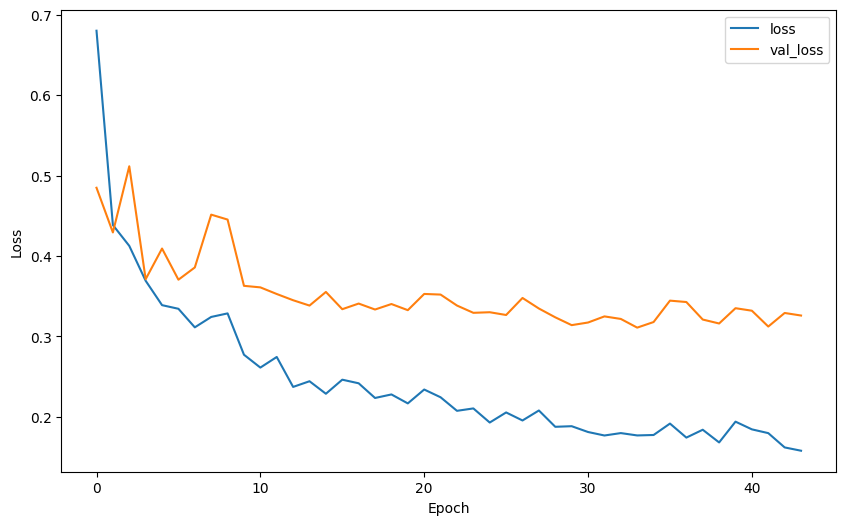

In [39]:
plt.figure(figsize=(10,6))
plt.plot(InceptionV3_summary.loss, label="loss")
plt.plot(InceptionV3_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

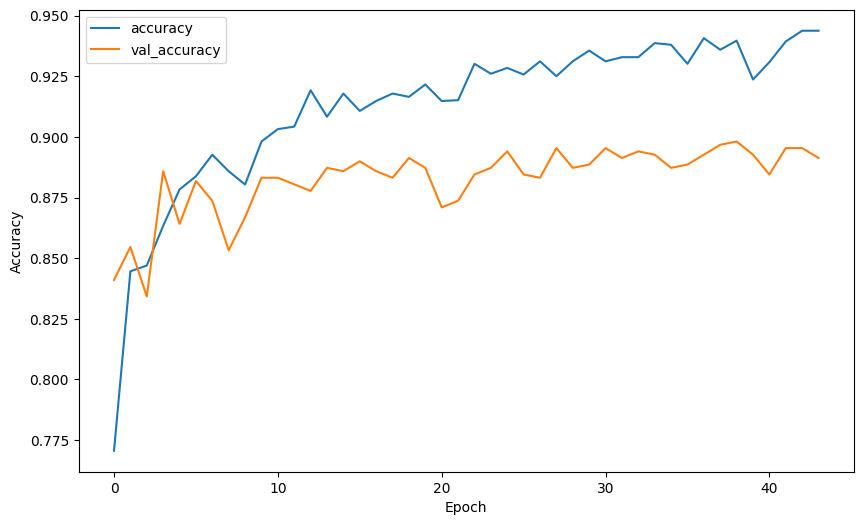

In [40]:
plt.figure(figsize=(10,6))
plt.plot(InceptionV3_summary.accuracy, label="accuracy")
plt.plot(InceptionV3_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [41]:
#Get Predictions;
InceptionV3_model_pred_probabilities = InceptionV3_model.predict(test_image_gen)
InceptionV3_model_pred_probabilities

# Transform Probabilites to Clasesses 
InceptionV3_model_probs = np.array(InceptionV3_model_pred_probabilities)
InceptionV3_model_predictions = np.argmax(InceptionV3_model_probs, axis=1)

# Predictions
print("Predictions: ", InceptionV3_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

23/23 [==============================] - 33s 1s/step
Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, InceptionV3_model_predictions))
print(classification_report(test_image_gen.classes, InceptionV3_model_predictions))

[[112   7   1   4   3]
 [  4 162   2   5   7]
 [  1   0 110   4  14]
 [  1   3   4 128   4]
 [  2   0  12   2 144]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       127
           1       0.94      0.90      0.92       180
           2       0.85      0.85      0.85       129
           3       0.90      0.91      0.90       140
           4       0.84      0.90      0.87       160

    accuracy                           0.89       736
   macro avg       0.89      0.89      0.89       736
weighted avg       0.89      0.89      0.89       736



### Modeli Disa Aktaralim

In [46]:
from tensorflow.keras.models import load_model
InceptionV3_model.save('InceptionV3_manuel_saving.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_InceptionV3.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")

## XCeption

**Xception** (**Extreme Inception**):  isim, "**eXtreme Classification**" kelimesinin kısaltmasıdır. Xception, **Google tarafından geliştirilen** ve **Inception mimarisinin daha da geliştirilmiş bir versiyonudur**. Temel olarak, derin öğrenme ağlarının **performansını artırmak** ve hesaplama **maliyetini azaltmak** amacıyla tasarlanmıştır.

**Inception ve Xception Arasındaki Fark:**

**Inception**, **paralel konvolüsyon katmanlarından oluşan modüler bir yapı** kullanırken, **Xception** tamamen **derin konvolüsyon katmanlarından oluşan bir yapı** kullanır. Xception, "Depthwise Separable Convolution" adı verilen bir tür konvolüsyon işlemi kullanarak giriş verilerini işler. Bu, parametre sayısını azaltır ve daha fazla öğrenmeyi mümkün kılar.

**Çalışma Prensibi:**

**Xception**, **standart konvolüsyonlar yerine ağırlıklı çarpım işlemlerini kullanarak özellik haritalarını oluşturur**. Bu, **giriş verilerinin daha etkili bir şekilde öğrenilmesine ve özelliklerin çıkarılmasına yardımcı olur**.

**Avantajları:**

Xception, daha derin ağlarla karşılaştırıldığında daha az parametreye sahip olduğu için, özellikle hesaplama maliyeti ve bellek kullanımı konularında avantajlıdır.
Görüntü sınıflandırma ve nesne tanıma gibi görevlerde yüksek doğruluk sağlayabilir.
Kullanım Alanları:

Xception, özellikle bilgisayarlı görüşle ilgilenen uygulamalarda yaygın olarak kullanılır. Görüntü sınıflandırma, nesne tespiti, yüz tanıma ve diğer benzeri görevlerde etkilidir.
Transfer Öğrenme:

Xception, transfer öğrenme için de yaygın olarak kullanılır. Önceden eğitilmiş Xception modelleri, özellik çıkarma için kullanılabilir ve daha sonra yeni bir görev için ince ayarlama yapabilirsiniz.
Xception, hesaplama maliyetini azaltan ve yüksek performans sağlayan derin öğrenme mimarilerinden biridir ve özellikle sınıflandırma ve görsel tanıma görevlerinde yaygın olarak tercih edilir.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Xception modelini çağıralım
Xception_model = Sequential()

# Önceden indirilmiş ağırlıkları kullanalım
pretrained_model = Xception(
                            include_top=False,
                            input_shape=(299, 299, 3),
                            weights='imagenet',  # Önceden indirilmiş ağırlıkları kullan
                            pooling=None,
                            classifier_activation="softmax"
                            )

# Xception'ın ağırlıklarını eğitilemez yapalım
for layer in pretrained_model.layers:
    layer.trainable = False

Xception_model.add(pretrained_model)

# GlobalAveragePooling2D ekleyelim
Xception_model.add(GlobalAveragePooling2D())

# ---ANN---

# Tam bağlı katman ekleyelim
Xception_model.add(Dense(512, activation='relu'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.3))

# Çıkış Katmanı
Xception_model.add(Dense(5, activation='softmax'))

# Özelleştirilmiş Adam optimizer'ı kullanalım
optimizer = Adam(learning_rate=0.001)  # Başlangıç öğrenme oranı

# Modeli derleyelim (Compile edelim)
Xception_model.compile(loss='categorical_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])

# Callback'leri tanımlayalım
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('Xception.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

# Öğrenme oranını düzenleyelim (LR)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Model özeti
Xception_model.summary()

### Model Training

In [45]:
Xception_model_results = Xception_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.7146 - accuracy: 0.7791
Epoch 1: val_loss improved from inf to 0.43074, saving model to Xception.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 279s 3s/step - loss: 0.7146 - accuracy: 0.7791 - val_loss: 0.4307 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8412
Epoch 2: val_loss improved from 0.43074 to 0.39905, saving model to Xception.h5
92/92 [==============================] - 275s 3s/step - loss: 0.4485 - accuracy: 0.8412 - val_loss: 0.3991 - val_accuracy: 0.8601 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8647
Epoch 3: val_loss improved from 0.39905 to 0.37552, saving model to Xception.h5
92/92 [==============================] - 282s 3s/step - loss: 0.3802 - accuracy: 0.8647 - val_loss: 0.3755 - val_accuracy: 0.8641 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.8746
Epoch 4: val_loss improved from 0.37552 to 0.36462, saving model to Xception.h5
92/92 [==============================] - 299s 3s/

### Evaluating the Model

In [46]:
Xception_summary = pd.DataFrame(Xception_model.history.history)
Xception_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
21,0.161224,0.940695,0.285759,0.910326,0.0001
22,0.147931,0.948534,0.285009,0.914402,0.0001
23,0.151242,0.950920,0.289871,0.913043,0.0001
24,0.158125,0.943081,0.283215,0.915761,0.0001
25,0.157827,0.946489,0.281310,0.913043,0.0001


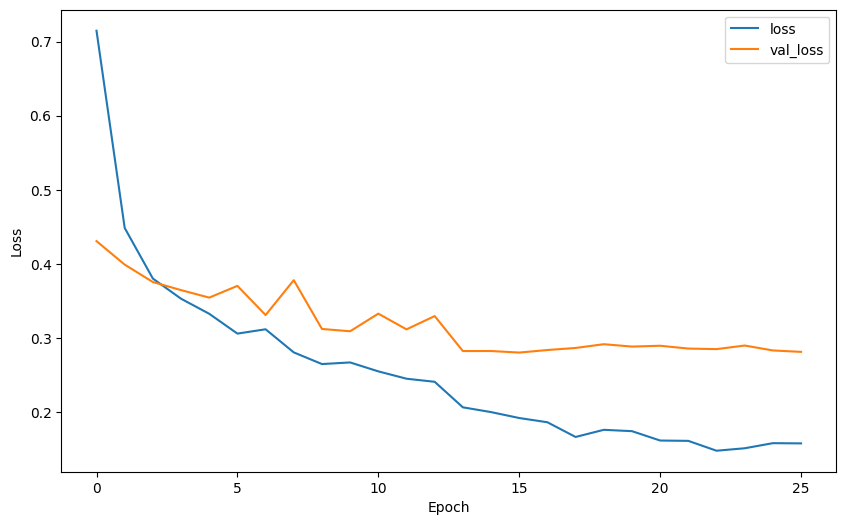

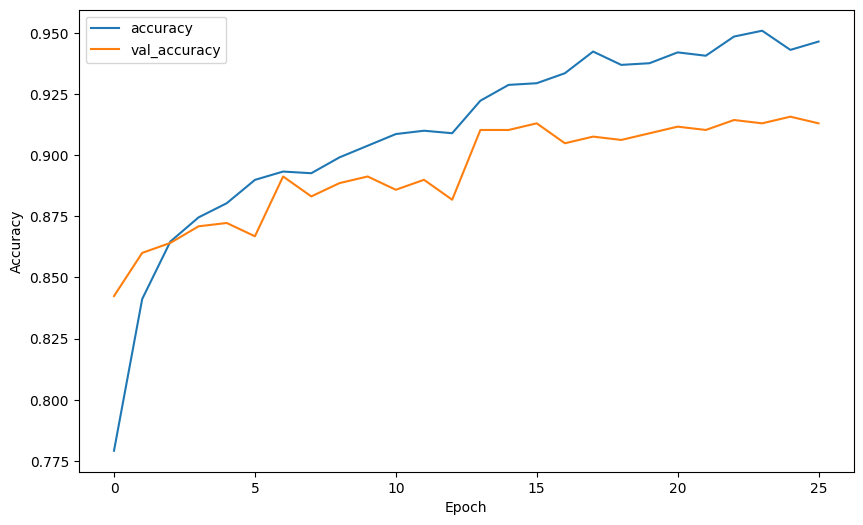

In [47]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(Xception_summary.loss, label="loss")
plt.plot(Xception_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(Xception_summary.accuracy, label="accuracy")
plt.plot(Xception_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()


In [48]:
#Get Predictions;
Xception_model_pred_probabilities = Xception_model.predict(test_image_gen)
Xception_model_pred_probabilities

# Transform Probabilites to Clasesses 
Xception_model_probs = np.array(Xception_model_pred_probabilities)
Xception_model_predictions = np.argmax(Xception_model_probs, axis=1)

# Predictions
print("Predictions: ", Xception_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])


23/23 [==============================] - 54s 2s/step
Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [49]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, Xception_model_predictions))
print(classification_report(test_image_gen.classes, Xception_model_predictions))


[[117   7   0   2   1]
 [  4 164   2   4   6]
 [  4   0 113   3   9]
 [  1   3   3 130   3]
 [  0   2   8   2 148]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       127
           1       0.93      0.91      0.92       180
           2       0.90      0.88      0.89       129
           3       0.92      0.93      0.93       140
           4       0.89      0.93      0.91       160

    accuracy                           0.91       736
   macro avg       0.91      0.91      0.91       736
weighted avg       0.91      0.91      0.91       736



### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
NASNetMobile_model.save('Xception_Manuel_Saving.h5')

## MobilNetV2

Gorece hizli calisiyor ama skorlar dusuk!

MobilNet'in önceki CNN modellerine göre **üstün yanları:** 

1) **Daha az parametre ve hesaplama gücü gerektirir**, bu da daha hafif ve hızlı modeller oluşturmanızı sağlar.

2) MobilNet, derinlik ayrıştırma adı verilen bir teknik kullanarak **ağı daha hafif hale getirir**. Bu, ağın daha az hesaplama gücü gerektiren daha hafif öğrenme çekirdeklerine sahip olmasını sağlar.

3) MobilNet, genellikle transfer öğrenme uygulamalarında **iyi performans gösterir**. 

4) MobilNet, **düşük bellek gereksinimleri** ve **hızlı tahminler için optimize edilmiştir**. Bu, daha düşük maliyetli donanımlar üzerinde bile etkili bir şekilde çalışmasını sağlar.

MobileNet ve MobileNetV2 modellei bulunmakta olup, **MobileNetV2**, orijinal MobileNet'e göre daha hızlı ve daha iyi performans sunar. Bu, **daha derin ağ yapıları** ve **daha fazla optimize edilmiş katmanlar** kullanarak elde edilir.



In [64]:
#Flatten yernie GlobalAveragePooling2D kullandik (skorlari iyilestirmek icin)
#LR oprimizer kullandik (en iyi LR yi bulmak icin)
#Chckpoint kullandik (ara basamaklarda da en iyi modeli kaydetmek icin)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# MobileNetV2 Modelini çağıralım
MobileNetV2_model = Sequential()

pretrained_model = MobileNetV2(input_shape=(224, 224, 3),
                               include_top=False,
                               weights=None,  # We will not use the pretrained weights
                               pooling=None)

# MobileNetV2'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

MobileNetV2_model.add(pretrained_model)

# GlobalAveragePooling2D eklenir ---Flatten yerine geldi bu---
NASNetMobile_model.add(GlobalAveragePooling2D())

# ---ANN---

# Fully Connected Layer
MobileNetV2_model.add(Dense(512, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.3))

# Çıkış Katmanı
MobileNetV2_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.

# Modeli derleyelim
MobileNetV2_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('MobileNetV2.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.


# Model özeti
MobileNetV2_model.summary()

Epoch 1/50
92/92 [==============================] - 121s 1s/step - loss: 1.6028 - accuracy: 0.2413 - val_loss: 1.6005 - val_accuracy: 0.2446 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - 96s 1s/step - loss: 1.6013 - accuracy: 0.2447 - val_loss: 1.6014 - val_accuracy: 0.2446 - lr: 9.0000e-04
Epoch 3/50
92/92 [==============================] - 95s 1s/step - loss: 1.6023 - accuracy: 0.2427 - val_loss: 1.6004 - val_accuracy: 0.2446 - lr: 8.1000e-04
Epoch 4/50
92/92 [==============================] - 94s 1s/step - loss: 1.6014 - accuracy: 0.2447 - val_loss: 1.6011 - val_accuracy: 0.2446 - lr: 7.2900e-04
Epoch 5/50
92/92 [==============================] - 95s 1s/step - loss: 1.6012 - accuracy: 0.2447 - val_loss: 1.6004 - val_accuracy: 0.2446 - lr: 6.5610e-04
Epoch 6/50
92/92 [==============================] - 99s 1s/step - loss: 1.6015 - accuracy: 0.2447 - val_loss: 1.6010 - val_accuracy: 0.2446 - lr: 5.9049e-04
Epoch 7/50
92/92 [==============================] - 96s 1s/st

### Model Training

In [ ]:
# Modeli eğitelim
MobileNetV2_model_results = MobileNetV2_model.fit(train_image_gen, epochs=50,
                                                  validation_data=test_image_gen,
                                                  callbacks=[early_stop, lr_schedule])

 ### Evaluating the Model

In [65]:
MobileNetV2_model_summary = pd.DataFrame(MobileNetV2_model.history.history)
MobileNetV2_model_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.602773,0.241309,1.600452,0.244565,0.001000
1,1.601261,0.244717,1.601407,0.244565,0.000900
2,1.602304,0.242672,1.600387,0.244565,0.000810
3,1.601425,0.244717,1.601135,0.244565,0.000729
4,1.601171,0.244717,1.600385,0.244565,0.000656


In [ ]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(MobileNetV2_summary.loss, label="loss")
plt.plot(MobileNetV2_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(MobileNetV2_summary.accuracy, label="accuracy")
plt.plot(MobileNetV2_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
MobileNetV2_model_pred_probabilities = MobileNetV2_model.predict(test_image_gen)
MobileNetV2_model_pred_probabilities

# Transform Probabilites to Clasesses 
MobileNetV2_model_probs = np.array(MobileNetV2_model_pred_probabilities)
MobileNetV2_model_predictions = np.argmax(MobileNetV2_model_probs, axis=1)

# Predictions
print("Predictions: ", MobileNetV2_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, MobileNetV2_model_predictions))
print(classification_report(test_image_gen.classes, MobileNetV2_model_predictions))

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
MobileNetV2_model.save('MobilNetV2_New.h5')

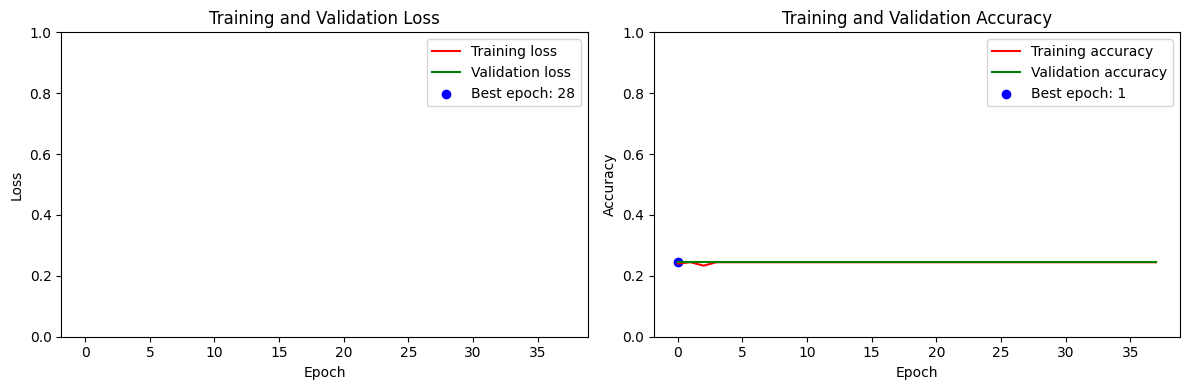

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Gerekli değişkenleri tanımlayın
tr_acc = MobileNetV2_model_results.history['accuracy']
tr_loss = MobileNetV2_model_results.history['loss']
val_acc = MobileNetV2_model_results.history['val_accuracy']
val_loss = MobileNetV2_model_results.history['val_loss']

# En iyi epochları bulun
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

# Eğitim sonuçlarını çizin
plt.figure(figsize=(12, 4))

# Kayıp (loss) grafiğini çizin
plt.subplot(1, 2, 1)
plt.plot(tr_loss, 'r', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.scatter(index_loss, val_loss[index_loss], c='blue', label=f'Best epoch: {index_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()

# Doğruluk (accuracy) grafiğini çizin
plt.subplot(1, 2, 2)
plt.plot(tr_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'g', label='Validation accuracy')
plt.scatter(index_acc, val_acc[index_acc], c='blue', label=f'Best epoch: {index_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = MobileNetV2_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = MobileNetV2_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = MobileNetV2_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

NameError: name 'test_df' is not defined

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(model, generators, steps, dataset_names):
    scores = {}

    for i, generator in enumerate(generators):
        score = model.evaluate(generator, steps=steps[i], verbose=1)
        scores[dataset_names[i]] = score

    df_scores = pd.DataFrame(scores, index=['Loss', 'Accuracy'])

    # Display the scores as a table
    display(df_scores)

    # Plot the scores as a bar plot
    df_scores.T.plot(kind='bar', figsize=(10,5))
    plt.title('Model Performance on Different Datasets')
    plt.ylabel('Score')
    plt.grid(axis='y')

    plt.show()

# Define the generators, steps and dataset names
generators = [train_gen, valid_gen, test_gen]
steps = [test_steps, test_steps, test_steps]
dataset_names = ['Train', 'Validation', 'Test']

# Call the function to evaluate the model and visualize the scores
evaluate_model(model, generators, steps, dataset_names)


NameError: name 'train_gen' is not defined

### Modeli Disa Aktaralim

In [37]:
from tensorflow.keras.models import load_model
MobileNetV2_model.save('MobilNetV2_New.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## DenseNet

DenseNet (Densely Connected Convolutional Networks)'un diğer CNN modellerine göre bazı avantajlari:

**1) Yoğun Bağlantılar (Dense Connections):** DenseNet, diğer CNN modellerinden farklı olarak **yoğun bağlantılar kullanır**. **Her katmandaki her çıkış, bir önceki katmandaki tüm çıkışlara bağlanır**. Bu, **bilgi akışını kolaylaştırır ve gradyan kaybını azaltır**. Aynı zamanda **daha az parametre kullanımı**na olanak tanır.

**2) Parametre Verimliliği:** Yoğun bağlantılar sayesinde DenseNet, **daha az öğrenilebilir parametre ile yüksek performans** elde edebilir. Bu, daha küçük modellerle aynı veya daha iyi sonuçlar elde etmeyi mümkün kılar.

**3) Gradient Flow:** **Yoğun bağlantılar, gradyanların daha iyi akmasını** sağlar. Bu da eğitim sırasında **daha hızlı ve daha istikrarlı bir şekilde öğrenme**ye olanak tanır. Ayrıca, derin ağlarda gradyan kaybını azaltır.

**4) Feature Reuse:** Yoğun bağlantılar sayesinde **her katman, önceki katmanların çıktılarını kullanabilir**. Bu, **özelliklerin tekrar tekrar kullanılmasına** ve **daha iyi özellik temsilini** teşvik eder.

**5) Ölçeklenebilirlik:** DenseNet, **farklı ölçeklerdeki verilerle iyi çalışabilir**. Bu, çeşitli uygulamalarda kullanılabilirliğini artırır.

**6) İyi Genelleme:** Yoğun bağlantılar, **overfit'e karşı daha dirençli** olma eğilimindedir ve daha iyi genelleme yeteneği sunar.

Dolayısıyla, DenseNet diğer CNN modellerine göre **daha etkili bilgi akışı, daha az parametre kullanımı ve daha iyi gradyan akışı** gibi avantajlara sahiptir. Bu özellikleri sayesinde, özellikle **sınırlı veriye sahip olduğunuzda** veya **kaynakları optimize etmek istediğinizde tercih edilebilir** bir seçenek olabilir.


**DenseNet121**, **DenseNet169** ve **DenseNet201** modelleri bulunmakta olup, **sonlarindaki sayilar katman adedini gostermektedir**. Katman sayisi arttikca performans artarken, daha fazla hsaplama gucu gerektirir. 


In [70]:
# Bu modele sunlari ekledik;
# 1) Faltten yerine GlobalPool2D
# 2) Checkpoint ekledim ki arabasamaklarda en iyi loss degerini buldugu modeli kaydetsin.
# 3) Reduce LR ekledim ki LR yi optimize etsin. 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization 
MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau 

# DenseNet201 Modelini çağıralım
DenseNet201_model = Sequential()

pretrained_model = DenseNet201(input_shape=(224, 224, 3),
                               include_top=False,
                               weights=None,  # We will not use the pretrained weights
                               pooling=None)

# DenseNet201'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

DenseNet201_model.add(pretrained_model)

# Flatten Layer (Input)
#DenseNet201_model.add(Flatten())

# Flatten yerine bunu kullandim
DenseNet201_model.add(GlobalAveragePooling2D())


# ---ANN---

# Fully Connected Layer
DenseNet201_model.add(Dense(512, activation='relu'))
DenseNet201_model.add(BatchNormalization())
DenseNet201_model.add(Dropout(0.3))

# Çıkış Katmanı
DenseNet201_model.add(Dense(5, activation='softmax'))


# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001) # Baslangic learning  rate degerimiz. LR asagida optimize edilecek. 

# Modeli derleyelim (compile edelim)
DenseNet201_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('DenseNet201.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk. 


# Model özeti
DenseNet201_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_3  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 512)               983552    
                                                                 
 batch_normalization_101 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

### Model Training

In [71]:
# Modeli eğitelim
DenseNet201_model_results = DenseNet201_model.fit(train_image_gen, epochs=50,
                                                  validation_data=test_image_gen,
                                                  callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 1.3205 - accuracy: 0.4451
Epoch 1: val_loss improved from inf to 1.56185, saving model to DenseNet201.h5
92/92 [==============================] - 410s 4s/step - loss: 1.3205 - accuracy: 0.4451 - val_loss: 1.5619 - val_accuracy: 0.2174 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.2032 - accuracy: 0.5147
Epoch 2: val_loss improved from 1.56185 to 1.53039, saving model to DenseNet201.h5
92/92 [==============================] - 405s 4s/step - loss: 1.2032 - accuracy: 0.5147 - val_loss: 1.5304 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 1.1883 - accuracy: 0.5102
Epoch 3: val_loss improved from 1.53039 to 1.48515, saving model to DenseNet201.h5
92/92 [==============================] - 402s 4s/step - loss: 1.1883 - accuracy: 0.5102 - val_loss: 1.4852 - val_accuracy: 0.2609 - lr: 0.0010
Epoch 4/50
92/92 [==========================

Epoch 28/50
92/92 [==============================] - ETA: 0s - loss: 1.0018 - accuracy: 0.6097
Epoch 28: val_loss did not improve from 1.00934
92/92 [==============================] - 380s 4s/step - loss: 1.0018 - accuracy: 0.6097 - val_loss: 1.0384 - val_accuracy: 0.5761 - lr: 1.0000e-04
Epoch 29/50
92/92 [==============================] - ETA: 0s - loss: 1.0067 - accuracy: 0.6162
Epoch 29: val_loss did not improve from 1.00934
92/92 [==============================] - 401s 4s/step - loss: 1.0067 - accuracy: 0.6162 - val_loss: 1.0870 - val_accuracy: 0.5611 - lr: 1.0000e-04
Epoch 30/50
92/92 [==============================] - ETA: 0s - loss: 0.9927 - accuracy: 0.6145
Epoch 30: val_loss did not improve from 1.00934
92/92 [==============================] - 404s 4s/step - loss: 0.9927 - accuracy: 0.6145 - val_loss: 1.0141 - val_accuracy: 0.5978 - lr: 1.0000e-04
Epoch 31/50
92/92 [==============================] - ETA: 0s - loss: 1.0040 - accuracy: 0.6172
Epoch 31: val_loss did not improve 

### Evaluating the Model

In [72]:
DenseNet201_model_summary = pd.DataFrame(DenseNet201_model.history.history)
DenseNet201_model_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
26,1.014401,0.609407,1.065125,0.578804,0.0001
27,1.001777,0.609748,1.038446,0.576087,0.0001
28,1.006745,0.616224,1.086956,0.561141,0.0001
29,0.992744,0.614519,1.014139,0.597826,0.0001
30,1.004011,0.617246,1.019782,0.616848,0.0001


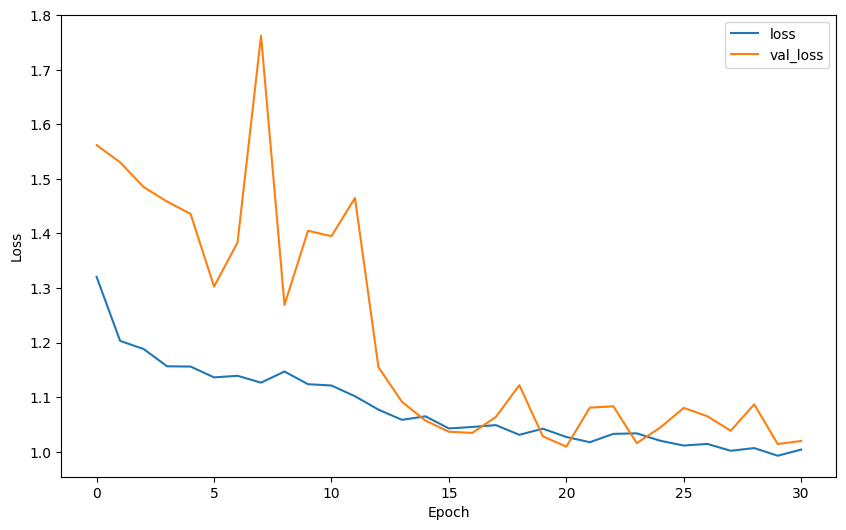

In [73]:
plt.figure(figsize=(10,6))
plt.plot(DenseNet201_model_summary.loss, label="loss")
plt.plot(DenseNet201_model_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

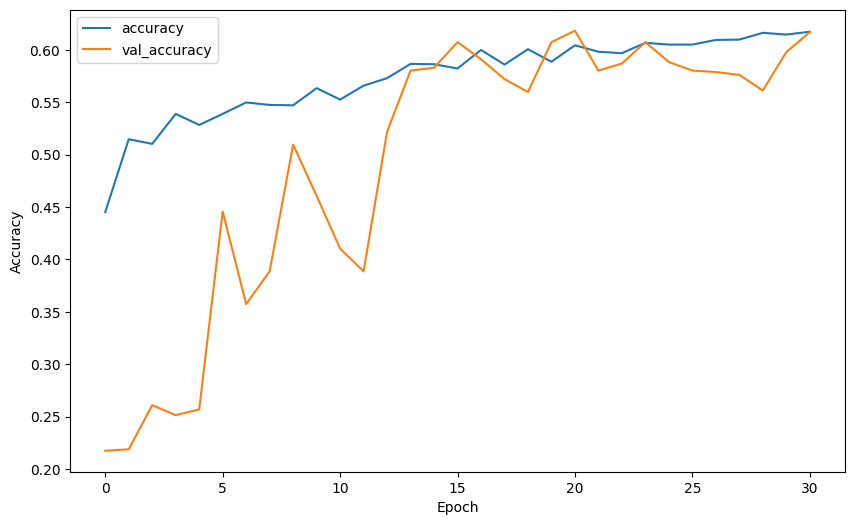

In [74]:
plt.figure(figsize=(10,6))
plt.plot(DenseNet201_model_summary.accuracy, label="accuracy")
plt.plot(DenseNet201_model_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
#Get Predictions;
DenseNet201_model_pred_probabilities = DenseNet201_model.predict(test_image_gen)
DenseNet201_model_pred_probabilities

# Transform Probabilites to Clasesses 
DenseNet201_model_probs = np.array(DenseNet201_model_pred_probabilities)
DenseNet201_model_predictions = np.argmax(DenseNet201_model_probs, axis=1)

# Predictions
print("Predictions: ", DenseNet201_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, DenseNet201_model_predictions))
print(classification_report(test_image_gen.classes, DenseNet201_model_predictions))

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
DenseNet201_model.save('DenseNet201_manuel_saving.h5')

## NasNet

NASNet (Neural Architecture Search Network), **transfer öğrenme ile ilgili bir model değil**, bir **model mimarisi araştırma yaklaşımıdır**. NASNet, **nöral ağ mimarilerini otomatik olarak aramak ve optimize etmek** için kullanılan bir yöntemdir.

**NASNet**, **yapay zeka araştırmacılarının** ve **mühendislerin** **özelleştirilmiş nöral ağ mimarilerini otomatik olarak aramak** ve **oluşturmak** için kullanabileceği bir yaklaşımdır. Bu, **modelin öğrenme kapasitesini ve performansını artırmak için tasarım alanında daha verimli ve etkili ağlar elde etme** potansiyelini taşır.

**NASNet'in Çalışma Prensibi:**

NASNet, genellikle bir "**arama uzayı**" adı verilen bir dizi **olası nöral ağ katmanı** ve **bağlantıların oluşturulduğu bir tasarım alanı kullanır**. Ardından, bu tasarım alanında nöral ağları değerlendirmek ve optimize etmek için bir dizi ölçüt kullanarak **en iyi ağı bulmak için bir arama algoritması kullanır**. Bu, insanlar tarafından tasarlanan **geleneksel ağ mimarilerinden daha etkili** ve **özelleştirilmiş ağlar elde edilmesini** sağlar.



**NASNetMobile** ve **NASNetLarge** seklinde **iki versiyonu** vardir. **NASNetMobile**, daha **küçük** ve daha **hafif bir modeldir**. Bu, **daha az parametreye** ve daha **düşük hesaplama maliyeti**ne sahip olduğu anlamına gelir. Daha taşınabilir cihazlarda kullanım için uygundur ve daha az kaynak gerektirir. **NASNetLarge** **daha büyük** ve daha **karmaşık bir modeldir**. Bu model daha fazla **derinlik**, daha **fazla nöron** ve **daha fazla parametre içerir**. Yani daha büyük bir hesaplama gücü ve daha fazla veri gerektirir.



In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# NASNetMobile Modelini çağıralım
NASNetMobile_model = Sequential()

pretrained_model = NASNetMobile(include_top=False,
                                input_shape=(224, 224, 3),
                                weights='imagenet',
                                pooling=None,
                                classifier_activation="softmax"
                                )

# NASNetMobile'ın ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

NASNetMobile_model.add(pretrained_model)

# GlobalAveragePooling2D eklenir
NASNetMobile_model.add(GlobalAveragePooling2D())

# ---ANN---

# Fully Connected Layer
NASNetMobile_model.add(Dense(512, activation='relu'))
NASNetMobile_model.add(BatchNormalization())
NASNetMobile_model.add(Dropout(0.3))

# Çıkış Katmanı
NASNetMobile_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.

# Modeli derleyelim (Compile edelim)
NASNetMobile_model.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('NASNetMobile.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.


# Model özeti
NASNetMobile_model.summary()

### Model Training

In [52]:
NASNetMobile_model_results = NASNetMobile_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.7916 - accuracy: 0.7471
Epoch 1: val_loss improved from inf to 0.56230, saving model to NASNetMobile.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 151s 1s/step - loss: 0.7916 - accuracy: 0.7471 - val_loss: 0.5623 - val_accuracy: 0.7976 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4996 - accuracy: 0.8269
Epoch 2: val_loss improved from 0.56230 to 0.47554, saving model to NASNetMobile.h5
92/92 [==============================] - 127s 1s/step - loss: 0.4996 - accuracy: 0.8269 - val_loss: 0.4755 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.8405
Epoch 3: val_loss improved from 0.47554 to 0.44803, saving model to NASNetMobile.h5
92/92 [==============================] - 119s 1s/step - loss: 0.4314 - accuracy: 0.8405 - val_loss: 0.4480 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.4008 - accuracy: 0.8541
Epoch 4: val_loss improved from 0.44803 to 0.39546, saving model to NASNetMobile.h5
92/92 [==============================

### Evaulating the Model  

In [53]:
NASNetMobile_summary = pd.DataFrame(NASNetMobile_model.history.history)
NASNetMobile_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
21,0.230960,0.916155,0.365768,0.880435,0.0001
22,0.218132,0.923313,0.364679,0.880435,0.0001
23,0.223974,0.916837,0.366044,0.877717,0.0001
24,0.211186,0.930470,0.364787,0.880435,0.0001
25,0.213855,0.920586,0.374275,0.880435,0.0001


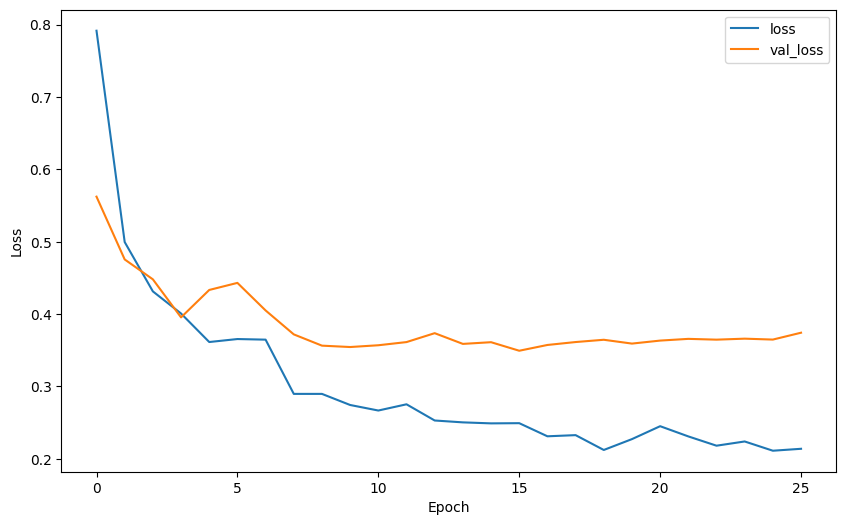

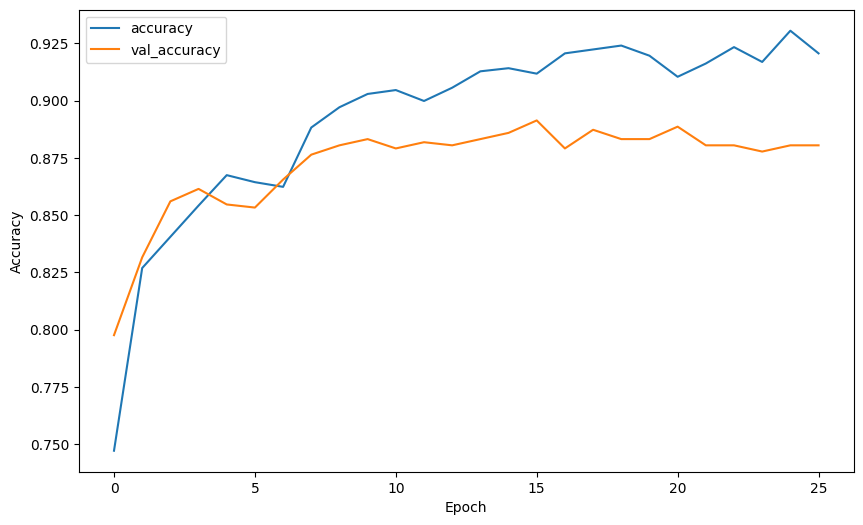

In [54]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(NASNetMobile_summary.loss, label="loss")
plt.plot(NASNetMobile_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(NASNetMobile_summary.accuracy, label="accuracy")
plt.plot(NASNetMobile_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [63]:
NASNetMobile_model_pred_probabilities = NASNetMobile_model.predict(test_image_gen)
NASNetMobile_model_pred_probabilities

# Transform Probabilites to Clasesses 
NASNetMobile_model_probs = np.array(NASNetMobile_model_pred_probabilities)
NASNetMobile_model_predictions = np.argmax(NASNetMobile_model_probs, axis=1)

# Predictions
print("Predictions: ", NASNetMobile_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

23/23 [==============================] - 21s 888ms/step
Predictions:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, NASNetMobile_model_predictions))
print(classification_report(test_image_gen.classes, NASNetMobile_model_predictions))

[[109   8   2   4   4]
 [  3 162   1   6   8]
 [  1   0 105   7  16]
 [  1   4   2 127   6]
 [  1   0  12   2 145]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       127
           1       0.93      0.90      0.92       180
           2       0.86      0.81      0.84       129
           3       0.87      0.91      0.89       140
           4       0.81      0.91      0.86       160

    accuracy                           0.88       736
   macro avg       0.88      0.88      0.88       736
weighted avg       0.88      0.88      0.88       736



### Modeli Disa Aktaralim

In [65]:
from tensorflow.keras.models import load_model
NASNetMobile_model.save('NASNetMobile_New.h5')

#NASNetMobile_model.save('NASNetMobile2', save_format="h5", encoding="utf-8") Kaydettigin dosyayi acmada sorun yasarsan bunu da kullanabilirsin kaydederken.

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## ConvNextTiny


ConvNeXt is a pure convolutional neural network (CNN) architecture that is inspired by the design of Vision Transformers (ViTs). It was proposed in the paper "ConvNeXt: A Transformer-Inspired CNN Architecture for Visual Recognition" by Chen et al. (2022).

ConvNeXt builds on the strengths of CNNs and ViTs. CNNs are known for their ability to capture local patterns in images, while ViTs are known for their ability to capture global patterns. ConvNeXt combines these strengths by using a hierarchical architecture that consists of multiple stages. Each stage consists of a stack of convolutional blocks, followed by a self-attention block.

The convolutional blocks in ConvNeXt use a depthwise separable convolution operation. This operation allows ConvNeXt to reduce the number of parameters and computations, while still maintaining accuracy. The self-attention blocks in ConvNeXt use a masked self-attention operation. This operation allows ConvNeXt to capture global dependencies between features in an image.

ConvNeXt has been shown to be effective on a variety of image classification tasks. It has achieved state-of-the-art results on the ImageNet, CIFAR-10, and CIFAR-100 datasets.

Here are some of the key features of ConvNeXt:

It is a pure convolutional neural network.
It is inspired by the design of Vision Transformers.
It uses a hierarchical architecture that consists of multiple stages.
Each stage consists of a stack of convolutional blocks, followed by a self-attention block.
The convolutional blocks in ConvNeXt use a depthwise separable convolution operation.
The self-attention blocks in ConvNeXt use a masked self-attention operation.
ConvNeXt is a promising new architecture for image classification. It is still under development, but it has the potential to be a powerful tool for computer vision tasks.

https://colab.research.google.com/drive/1a-xP3pkxEOz2t_dNOCEqxCLG_PjpUfZs

In [ ]:
#Tulin H. Colab'dan

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Veri kümesine uygun giriş şeklini belirleyin (örneğin, image_shape)
image_shape = (224, 224, 3)  # Örnek bir şekil, veri kümenize uygun olarak değiştirilmelidir

# ConvNeXtTiny modelini yükleyin
pretrained_model = tf.keras.applications.ConvNeXtTiny(include_top=False,
                                                      weights="imagenet",
                                                      input_shape=image_shape,
                                                      pooling='avg'  # Global Average Pooling kullanmıyoruz
                                                      )
# Özelleştirilmiş üst katmanları ekleyin
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Özelleştirilmiş gizli katman
model.add(Dropout(0.5))  # Overfitting'i önlemek için dropout ekleniyor
model.add(Dense(5, activation='softmax'))  # 5 sınıflı veri kümesi için çıkış katmanı

# ConvNeXtTiny modelinin parametrelerini dondurun
for layer in pretrained_model.layers:
    layer.trainable = False

# Optimizer olarak Adam kullanabilirsiniz
opt = Adam(learning_rate=0.001)

# Modeli derleyin
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
#Callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Model özetini görüntüleyin
model.summary()

###  Model Training

In [ ]:
results = model.fit(train_image_gen,
                    epochs=50,
                    validation_data= test_image_gen,
                    callbacks=[early_stop, reduce_lr])  # Geri aramalar

### Evaulating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail()

In [ ]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
#Get Predictions;
ConvNeXtTiny_model_pred_probabilities = model.predict(test_image_gen)
ConvNeXtTiny_model_pred_probabilities

# Transform Probabilites to Clasesses 
ConvNeXtTiny_model_probs = np.array(ConvNeXtTiny_model_pred_probabilities)
ConvNeXtTiny_model_predictions = np.argmax(ConvNeXtTiny_model_probs, axis=1)

# Predictions
print("Predictions: ",ConvNeXtTiny_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, ConvNeXtTiny_model_predictions))
print(classification_report(test_image_gen.classes, ConvNeXtTiny_model_predictions))

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
model.save('ConvNeXtTiny_New.h5')

# Compare the Results & Model Success 

In [276]:
test_results = [
    {'Test': 'Manuel CNN', 'Accuracy Score': 0.81, 'Val_Accuracy': 72},
    {'Test': 'VGG16', 'Accuracy Score': 0.87, 'Val_Accuracy': 82},
    {'Test': 'ResNet152', 'Accuracy Score': 0.26, 'Val_Accuracy': 25},
    {'Test': 'EfficientNetV2B2', 'Accuracy Score': 0.31, 'Val_Accuracy': 37},
    {'Test': 'InceptionV3', 'Accuracy Score': 0.94, 'Val_Accuracy': 87}]

In [277]:
# Transform to DataFrame 
results_df = pd.DataFrame(test_results)

# Sort by f1-score and Misclassification together; 
sorted_results = results_df.sort_values(by=['Accuracy Score', 'Val_Accuracy'], ascending=[False, False])

# Let's show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;   
print(sorted_results_reset)   

               Test  Accuracy Score  Val_Accuracy
0       InceptionV3            0.94            87
1             VGG16            0.87            82
2        Manuel CNN            0.81            72
3  EfficientNetV2B2            0.31            37
4         ResNet152            0.26            25


Sınıf ağırlıklarını dengeleme, modelinizin eğitim sırasında belirli sınıflara daha fazla önem vermesini sağlar. Bu, eğitim veri setinde sınıflar arasında bir dengesizlik olduğunda, yani bazı sınıfların çok daha fazla örneği olduğunda kullanışlıdır. Sınıf ağırlıklarını dengeleyerek, modelin azınlık sınıflarına daha fazla dikkat etmesini ve böylece daha iyi bir genelleme performansı elde etmesini sağlayabilirsiniz.

TensorFlow/Keras'ta sınıf ağırlıklarını ayarlamak için şunları yapabilirsiniz:

1. **Sınıf Ağırlıklarını Hesaplayın:** Eğitim veri setindeki her bir sınıfın ağırlığını hesaplayın. Bu genellikle az temsil edilen sınıflara daha yüksek bir ağırlık atanarak yapılır.
2. **Modeli Eğitirken Ağırlıkları Kullanın:** Modelin `fit` metodunu çağırırken `class_weight` argümanını kullanarak sınıf ağırlıklarını belirtin.

İşte bir örnek:

```python
from sklearn.utils import class_weight
import numpy as np

# Sınıf ağırlıklarını hesaplayın
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_image_gen.classes),
                                                 train_image_gen.classes)

# Sınıf ağırlıklarını bir sözlüğe dönüştürün
class_weights = dict(enumerate(class_weights))

# Modeli eğitirken sınıf ağırlıklarını kullanın
model.fit(train_image_gen,
          epochs=20,
          validation_data=test_image_gen,
          class_weight=class_weights, # Sınıf ağırlıklarını burada belirtin
          callbacks=[early_stop, checkpoint])
```

Bu kodda:

- `class_weight.compute_class_weight('balanced', ...)` fonksiyonu, sınıf ağırlıklarını "dengeli" bir şekilde hesaplar. Yani, az temsil edilen sınıflara daha yüksek bir ağırlık atanır.
- `class_weights = dict(enumerate(class_weights))` satırı, ağırlıkları bir sözlüğe dönüştürür, böylece `fit` metodunda `class_weight` argümanı olarak kullanılabilirler.

Bu yaklaşım, modelin eğitim sırasında az temsil edilen sınıflara daha fazla dikkat etmesini sağlar, böylece genel performansı artırabilir.